In [1]:
import neuroglia

In [2]:
import numpy as np
import pandas as pd

In [3]:
def load_population():

    sample_rate = 30000.0

    cluster_groups = pd.read_csv('data/cluster_groups.csv',sep='\t')

    population = pd.DataFrame(dict(
        time = np.load('data/spike_times.npy')[:,0] / sample_rate ,
        neuron = np.load('data/spike_clusters.npy'),
    ))
    
    
    good_neurons = cluster_groups.groupby('group').get_group('good')['cluster_id']
    population = population[population['neuron'].isin(good_neurons)]

    return population

population = load_population()
last_time = population['time'].max()
print(last_time)

3773.6246


In [4]:
import pandas as pd
events = pd.DataFrame(dict(
    time = [110.0,120.0,130.0,140.0,150.0,160.0],
    lbl = ['a','b','a','a','b','b']
))

In [5]:
tensorizer = neuroglia.SpikeTensorizer(
    events,
    bins=np.arange(-0.1,0.5,0.001),
)

In [6]:
tensor = tensorizer.fit_transform(population)

In [7]:
tensor

<xarray.DataArray (event: 6, time_from_event: 599, neuron: 212)>
array([[[            nan,   1.271783e-039, ...,   7.943867e-002,             nan],
        [            nan,   1.744559e-038, ...,   6.649138e-002,             nan],
        ..., 
        [            nan,   7.888050e-005, ...,   2.709729e-002,             nan],
        [            nan,   1.627042e-004, ...,   3.593922e-002,             nan]],

       [[            nan,   0.000000e+000, ...,   4.936190e-002,   1.458120e-017],
        [            nan,   0.000000e+000, ...,   5.886101e-002,   2.604046e-018],
        ..., 
        [            nan,   4.013067e-012, ...,   7.929870e-002,   3.353928e-003],
        [            nan,   9.922527e-013, ...,   7.953577e-002,   5.453690e-003]],

       ..., 
       [[            nan,   5.773308e-006, ...,   4.139196e-038,   3.326110e-058],
        [            nan,   2.362952e-006, ...,   5.383021e-037,   8.181577e-057],
        ..., 
        [            nan,   1.164675e-039, ...

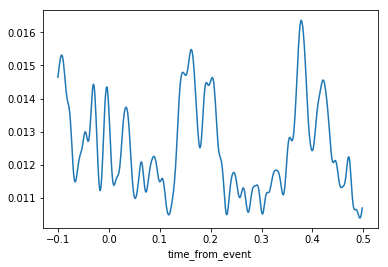

In [8]:
%matplotlib inline
tensor.mean(dim='event').mean('neuron').plot()

In [9]:
tensor.dims

('event', 'time_from_event', 'neuron')

In [12]:
tensor.swap_dims({'event':'time'})

<xarray.DataArray (time: 6, time_from_event: 599, neuron: 212)>
array([[[            nan,   1.271783e-039, ...,   7.943867e-002,             nan],
        [            nan,   1.744559e-038, ...,   6.649138e-002,             nan],
        ..., 
        [            nan,   7.888050e-005, ...,   2.709729e-002,             nan],
        [            nan,   1.627042e-004, ...,   3.593922e-002,             nan]],

       [[            nan,   0.000000e+000, ...,   4.936190e-002,   1.458120e-017],
        [            nan,   0.000000e+000, ...,   5.886101e-002,   2.604046e-018],
        ..., 
        [            nan,   4.013067e-012, ...,   7.929870e-002,   3.353928e-003],
        [            nan,   9.922527e-013, ...,   7.953577e-002,   5.453690e-003]],

       ..., 
       [[            nan,   5.773308e-006, ...,   4.139196e-038,   3.326110e-058],
        [            nan,   2.362952e-006, ...,   5.383021e-037,   8.181577e-057],
        ..., 
        [            nan,   1.164675e-039, ...,